<a href="https://colab.research.google.com/github/Okocha76/DS-Unit-2-Applied-Modeling/blob/master/module1/LS_DS10_231_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

In [0]:
%%capture
import sys

if 'google.colab' in sys.modules:
    # Install packages in Colab
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

In [0]:
import pandas as pd
euro_data = pd.read_csv('https://raw.githubusercontent.com/Okocha76/Okocha76.github.io/master/euro_data.csv', sep=';', engine='python', encoding = "ISO-8859-1")

In [29]:
print(euro_data.shape)
euro_data.head()

(8010, 41)


,TIME,GEO,GEO_LABEL,AGEMOTH,MEDAGEMOTH,TOTFERRT,JAN,CNMIGRAT,CNMIGRATRT,DEATH,GBIRTHRT,GDEATHRT,GROW,GROWRT,LBIRTH,NATGROW,NATGROWRT,RT,PER_KM2,EUR_HAB_2GDP,EUR_HAB_EU,EUR_HAB_EU27_2019,MIO_EUR,MIO_NAC,MIO_PPS,MIO_PPS_EU27_2019,PPS_EU27_2019_HAB,PPS_HAB,PPS_HAB_EU,PPS_HAB_EU27_2019,EMP,SAL,EUR_HAB_2HHINC,ED0-2_25_64,ED3_4_25_64,ED3-8_25_64,ED5-8_25_64,ED0-2_30_34,ED3_4_30_34,ED3-8_30_34,ED5-8_30_34
0,2000,AT,Austria,28.7,29.4,1.35,8002186,17272,2.2,76780,9.8,9.6,18760,2.3,78268,1488,0.2,4.8,97.2,26700,134,145,213606.48,213606.48,206251.54,195513.50,24400,25700,130,133,3755.0,3243.7,18000,23.8,62.1,76.2,14.1,16.7,67.4,83.3,15.9
1,2001,AT,Austria,28.9,29.6,1.31,8020946,42003,5.2,74767,9.4,9.3,42694,5.3,75458,691,0.1,4.8,97.5,27400,133,143,220525.08,220525.08,207461.48,197764.57,24600,25800,125,128,3782.0,3265.1,18300,22.5,62.6,77.5,14.8,16.0,67.9,84.0,16.1
2,2002,AT,Austria,29.1,29.8,1.38,8063640,34365,4.3,76131,9.7,9.4,36633,4.5,78399,2268,0.3,4.1,98.0,28100,132,141,226735.22,226735.22,216432.92,206562.16,25600,26800,126,129,3778.4,3258.1,18500,21.7,62.7,78.3,15.7,15.9,66.9,84.1,17.2
3,2003,AT,Austria,29.2,29.9,1.36,8100273,42565,5.2,77209,9.5,9.5,42300,5.2,76944,-265,0.0,4.5,98.5,28600,132,140,231862.46,231862.46,221219.87,214271.17,26400,27200,126,130,3803.0,3275.3,18900,21.0,63.3,79.0,15.7,14.3,68.1,85.7,17.6
4,2004,AT,Austria,28.8,29.5,1.42,8142573,54110,6.6,74292,9.7,9.1,58786,7.2,78968,4676,0.6,4.5,99.1,29700,132,140,242348.26,242348.26,233343.6,225461.43,27600,28600,127,130,3826.8,3290.1,19700,20.2,61.8,79.8,18.0,13.5,65.6,86.5,20.9


In [0]:
# Feature selection is not final. Just a quick & dirty approach for now.

df = euro_data.drop(
    ['CNMIGRAT','DEATH','GROW','GROWRT','LBIRTH','NATGROW','NATGROWRT',
     'EUR_HAB_2GDP','EUR_HAB_EU27_2019','MIO_EUR','MIO_NAC','MIO_PPS',
     'MIO_PPS_EU27_2019','PPS_EU27_2019_HAB','PPS_HAB','PPS_HAB_EU27_2019',
     'SAL','EUR_HAB_2HHINC','ED0-2_25_64','ED3_4_25_64','ED3-8_25_64',
     'ED5-8_25_64','ED3-8_30_34']
     ,axis=1)

In [0]:
df['JAN'] = pd.to_numeric(df['JAN'],errors='coerce')
df['TIME'] = df['TIME'].astype(int)

# A bit of feature engineering. EMP_PC is percentage employed.
df['EMP_PC'] = round((df['EMP'] * 100000)/df['JAN'],1)
df = df.drop(['JAN','EMP'], axis=1)

In [30]:
print(df.shape)
df.head()

(8010, 17)


,TIME,GEO,GEO_LABEL,AGEMOTH,MEDAGEMOTH,TOTFERRT,CNMIGRATRT,GBIRTHRT,GDEATHRT,RT,PER_KM2,EUR_HAB_EU,PPS_HAB_EU,ED0-2_30_34,ED3_4_30_34,ED5-8_30_34,EMP_PC
0,2000,AT,Austria,28.7,29.4,1.35,2.2,9.8,9.6,4.8,97.2,134,130,16.7,67.4,15.9,46.9
1,2001,AT,Austria,28.9,29.6,1.31,5.2,9.4,9.3,4.8,97.5,133,125,16.0,67.9,16.1,47.2
2,2002,AT,Austria,29.1,29.8,1.38,4.3,9.7,9.4,4.1,98.0,132,126,15.9,66.9,17.2,46.9
3,2003,AT,Austria,29.2,29.9,1.36,5.2,9.5,9.5,4.5,98.5,132,126,14.3,68.1,17.6,46.9
4,2004,AT,Austria,28.8,29.5,1.42,6.6,9.7,9.1,4.5,99.1,132,127,13.5,65.6,20.9,47.0


In [0]:
# Generate Pandas Profiling Report and export to html

import pandas_profiling

profile_report = df.profile_report(
    check_correlation_pearson=True,
    correlations={
        'pearson': True,
        'spearman': False,
        'kendall': False,
        'phi_k': False,
        'cramers': False,
        'recoded': False,
    },
    plot={'histogram': {'bayesian_blocks_bins': False}},
    )

profile_report.to_file(output_file="euro_data.html")

## Target choice & distribution. 

In [36]:
# My initial pick is migration rate.

y = df['CNMIGRATRT']

y.describe()

count    8010.000000
mean        2.459625
std         5.940023
min       -46.800000
25%        -0.200000
50%         1.800000
75%         5.200000
max        55.200000
Name: CNMIGRATRT, dtype: float64

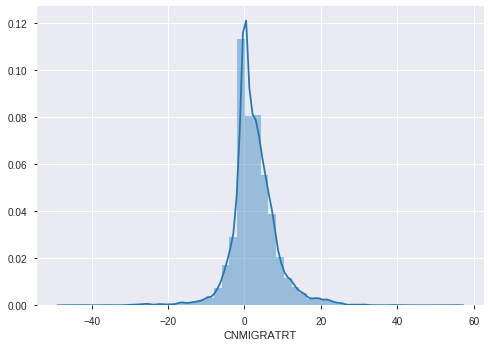

In [34]:
import seaborn as sns
sns.distplot(y);

Target is a bit right-skewed, but not much.

##  Evaluation metric

Normally, for regression models I would start out with a bunch of metrics (e.g. mean absolute error, root mean squared error, R^2). Examining the results, I will get a better idea which metric is most suitable for this model/problem.

## Train, validate and test observations.

Outliers - There are some outliers in this dataset. I will decide on a case-by-case basis which observations I need to remove.

Missing values - Dataset contains missing values. For some features zeros represent missing values. Probably best to replace these zeros by NaNs.

Train, validate, test - A time-based split seems most appropriate. Time series in this dataset all have interval 2000-2017 (18 yearly observations). I will start with train 2000-2011 (12), validate 2012-2014 (3) & test 2015-2017 (3).

## Begin to clean and explore your data. Begin to choose which features, if any, to exclude. Would some features "leak" future information?

More to come of course, but in cells above you can see I made a start.

## Try-out Area

In [0]:
train = df[df['TIME'] <= 2011]
val = df[(df['TIME'] > 2011) & (df['TIME'] < 2015)]
test = df[df['TIME'] >= 2015]

train.shape, val.shape, test.shape

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
model = LinearRegression()

In [43]:
target = 'CNMIGRATRT'
features = df.columns.drop([target, 'TIME', 'GEO', 'GEO_LABEL',
                            'EMP_PC']) # drop EMP_PC for now, need to clean first

X_train = train[features]
X_val = test[features]
X_test = test[features]
y_train = train[target]
y_val = val[target]
y_test = test[target]
print(f'Linear Regression, dependent on: {features}')

Linear Regression, dependent on: Index(['AGEMOTH', 'MEDAGEMOTH', 'TOTFERRT', 'GBIRTHRT', 'GDEATHRT', 'RT',
       'PER_KM2', 'EUR_HAB_EU', 'PPS_HAB_EU', 'ED0-2_30_34', 'ED3_4_30_34',
       'ED5-8_30_34'],
      dtype='object')


In [44]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
# model.intercept_, model.coef_
print('Intercept', model.intercept_)
coefficients = pd.Series(model.coef_, features)
print(coefficients.to_string())

Intercept -0.909506919808535
AGEMOTH        0.270270
MEDAGEMOTH    -0.010113
TOTFERRT      -2.804106
GBIRTHRT       0.314608
GDEATHRT      -0.146237
RT            -0.439679
PER_KM2       -0.000430
EUR_HAB_EU    -0.006719
PPS_HAB_EU     0.027570
ED0-2_30_34    0.014256
ED3_4_30_34   -0.057662
ED5-8_30_34    0.059643


In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [48]:
y_pred = model.predict(X_train)

rmse = mean_squared_error(y_train, y_pred)**(.5)
print(f'Train RMSE: {rmse:,.2f}')

mae = mean_absolute_error(y_train, y_pred)
print(f'Train MAE: {mae:,.2f}')

R2 = model.score(X_train, y_train)
print(f'Train R^2: {R2:,.4f}')

Train RMSE: 5.04
Train MAE: 3.33
Train R^2: 0.2452


In [0]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [51]:
# Fit regression model on train data
results = smf.ols('CNMIGRATRT ~ AGEMOTH + MEDAGEMOTH + TOTFERRT + GBIRTHRT + GDEATHRT + RT + PER_KM2 + EUR_HAB_EU + PPS_HAB_EU', data=train).fit()

rmse = results.mse_resid**(.5)
print(f'Train RMSE: {rmse:,.2f}')

mae = mean_absolute_error(y_train, results.fittedvalues)
print(f'Train MAE: {mae:,.2f}')

R2 = results.rsquared
print(f'Train R^2: {R2:,.4f}')

print(results.summary())

Train RMSE: 5.16
Train MAE: 3.45
Train R^2: 0.2084
                            OLS Regression Results                            
Dep. Variable:             CNMIGRATRT   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     155.9
Date:                Tue, 17 Dec 2019   Prob (F-statistic):          1.33e-262
Time:                        13:47:17   Log-Likelihood:                -16337.
No. Observations:                5340   AIC:                         3.269e+04
Df Residuals:                    5330   BIC:                         3.276e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I